# Milestone 9: New analysis

### a) Choose any new data analysis technique that you have not already done as part of your project, and apply it to your data.  Ideas: a new type of graph (see the Seaborn gallery for inspiration)regression if you did classification for Milestones 7 or 8, or vice versa a map anything covered in labs 19-24 (clustering, principal components analysis, permutation test anything covered in MAT 128 but not in MAT 328 (ex. hypothesis testing)
### b) Post your code on GitHub.
### c) On your project page, post:
#### i) a description of what you did,
#### ii) the results of your analysis, and
#### iii) what the reader should notice or conclude about these results

## Clustering using K-Means

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [5]:
data = pd.read_csv("./Sleep_health_and_lifestyle_dataset.csv") 

In [6]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')

In [7]:
data['Sleep Disorder'] = data['Sleep Disorder'].replace({
    'None': 0,
    'Sleep Apnea': 1,
    'Insomnia': 2
})

/var/folders/8j/v27l08612wv47smw2znyrg1w0000gn/T/ipykernel_27591/4010457807.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sleep Disorder'] = data['Sleep Disorder'].replace({


In [8]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,1
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1


In [9]:
features = ['Age', 'Heart Rate', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps', 'Sleep Disorder']
data_2 = data[features].dropna()
data_2.head()

,Age,Heart Rate,Sleep Duration,Physical Activity Level,Daily Steps,Sleep Disorder
0,27,77,6.1,42,4200,0
1,28,75,6.2,60,10000,0
2,28,75,6.2,60,10000,0
3,28,85,5.9,30,3000,1
4,28,85,5.9,30,3000,1


In [10]:
data_3 = data_2[['Age', 'Heart Rate', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps']]

In [11]:
# Standardizing the data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data_3)

### Elbow Method

In [13]:
inertia_list = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    clusters = kmeans.predict(x_scaled)
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

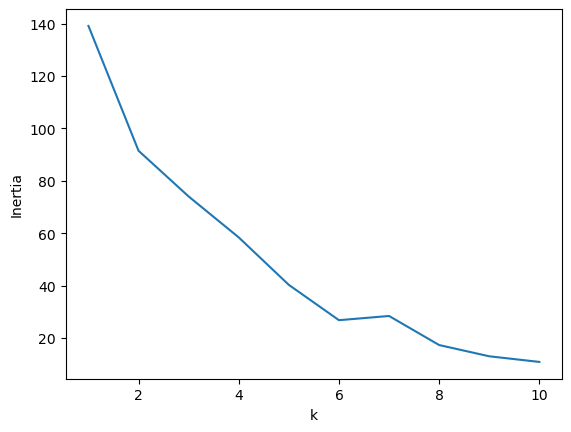

In [14]:
plt.plot(range(1,11), inertia_list)
plt.xlabel("k")
plt.ylabel("Inertia")

In [15]:
kmeans_3 = KMeans(n_clusters = 3)
kmeans_3.fit(x_scaled)
cluster = kmeans_3.predict(x_scaled)
cluster

array([2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,

In [16]:
data_3["cluster"] = cluster
data_3.head()

,Age,Heart Rate,Sleep Duration,Physical Activity Level,Daily Steps,cluster
0,27,77,6.1,42,4200,2
1,28,75,6.2,60,10000,1
2,28,75,6.2,60,10000,1
3,28,85,5.9,30,3000,2
4,28,85,5.9,30,3000,2


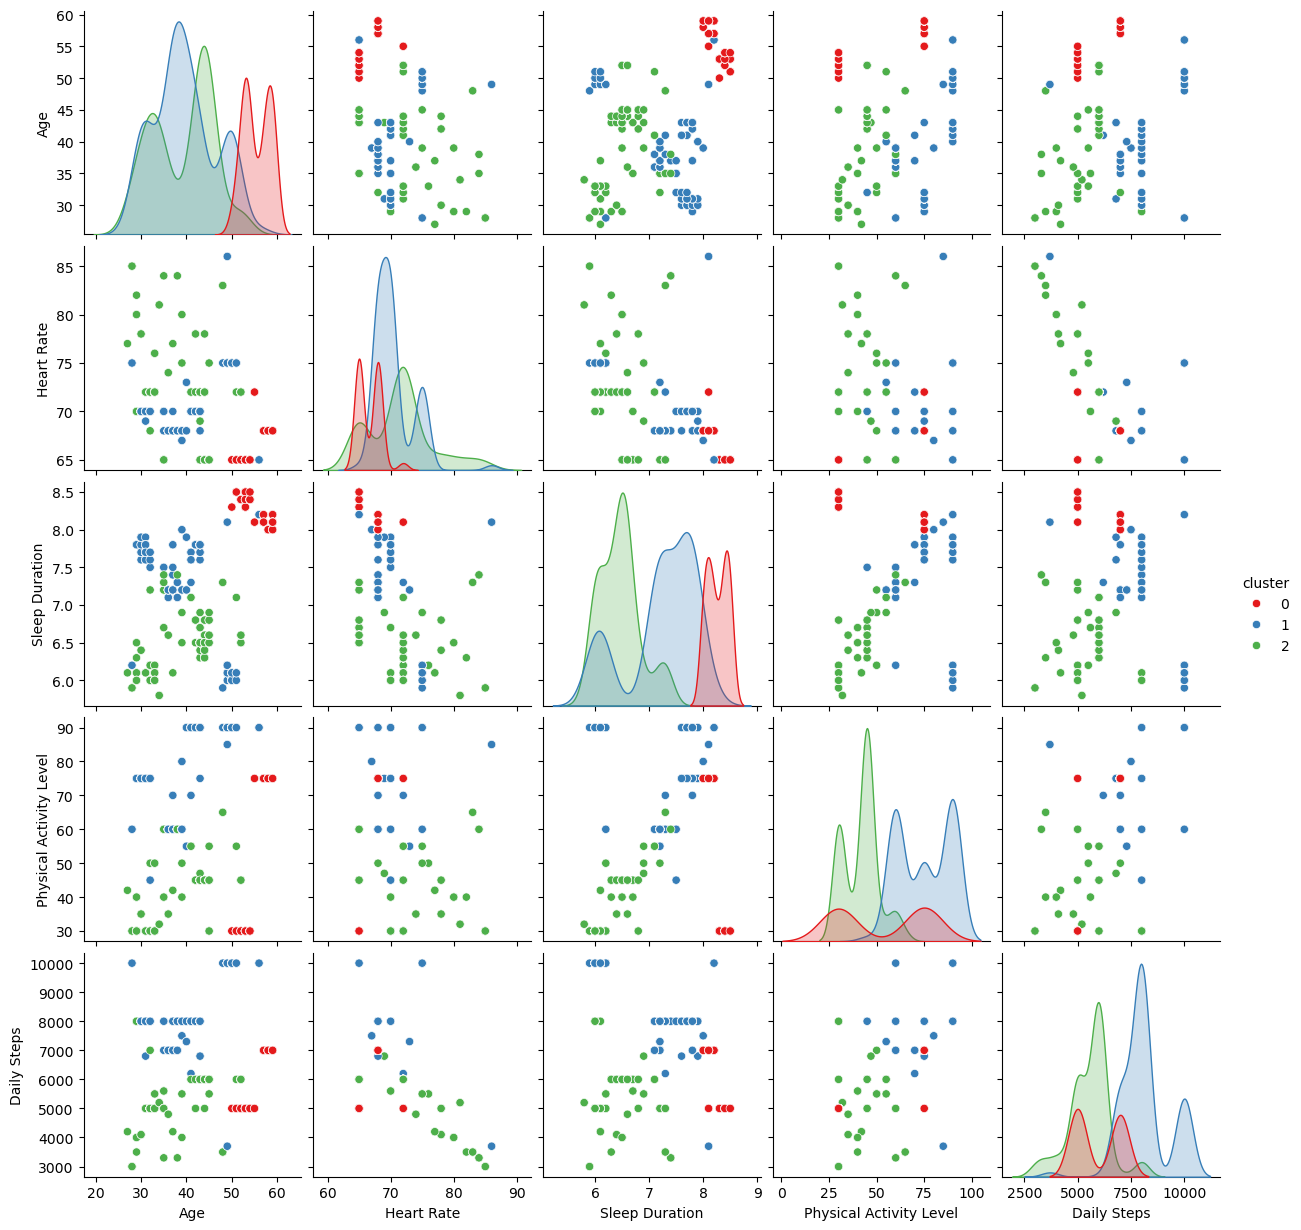

In [17]:
sns.pairplot(data = data_3, hue = "cluster", palette="Set1")